In [62]:
import sys
sys.path.append('/Users/glebdovzhenko/Dropbox/PycharmProjects/DissertationPlots')

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from data import tr_line_scan_idx, neutron_depth_scans_idx, neutron_depth_scans_offsets, \
    conical_slit_scans_idx, scans_2d_dir
from utilities import read_gsas_strain_csv, read_steca_output, read_conical_slits_data, young, poisson
import os

%matplotlib inline
textwidth = 390.  # pt
plt.rcParams['figure.figsize'] = (textwidth / 72., textwidth / 72. * 9. / 16.)  # inches
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Computer Modern Sans serif'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['text.usetex'] = True


e_params_al = (young['Al6082'], poisson['Al6082'])
e_params_ti = (young['Ti64'], poisson['Ti64'])

scale_ti = (-45, 45, -300, 500)
scale_al = (-45, 45, -150, 240)
scale_temp = (-10, 20, 0, 400)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sxl, syl, szl = '$\sigma_x$', '$\sigma_y$', '$\sigma_z$'
pxl, pyl, pzl = 'Distance from weld center $x$ [mm]', 'Distance from depos. start $y$ [mm]', 'Substrate depth $z$ [mm]'
stress_l = 'Residual stress $\sigma$ [MPa]'
stress_l_x = 'Transverse RS $\sigma _x$ [MPa]'
stress_l_y = 'Longitudinal RS $\sigma _y$ [MPa]'

plot_prefix = 'FSRSAl'
plot_wd = '/Users/glebdovzhenko/Dropbox/Apps/Overleaf/THESIS/pictures/'

In [64]:
tr_line_scan_idx.map(lambda x: os.path.split(x)[-1])

Material  Tr. vel.  Sub. Th.  BP  Machined  Cut out
Al5083    4.9       2         Al  False     False          Al1904_strain.csv
                                            True       Al1904_ref_strain.csv
          7.0       2         Al  False     False          Al1905_strain.csv
          10.0      2         Al  False     False          Al1906_strain.csv
Al6082    16.0      2         Al  False     False          Al1891_strain.csv
                                            False          Al1893_strain.csv
                                            False          Al2236_strain.csv
                                            True       Al1891_ref_strain.csv
                                  True      False          Al1890_strain.csv
                                            False          Al1892_strain.csv
                    4         Al  False     False          Al2238_strain.csv
                    6         Al  False     False          Al2234_strain.csv
                    8   

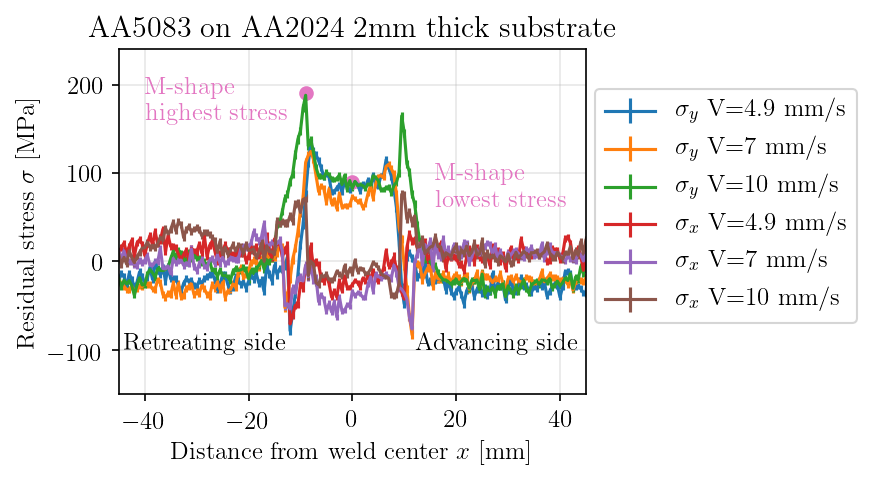

In [65]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 4.9, 2, 'Al', False, False], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 7, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 10, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure()

plt.title('AA5083 on AA2024 2mm thick substrate')
plt.xlabel(pxl)
plt.ylabel(stress_l)

plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' V=4.9 mm/s')
plt.errorbar(data2.index, data2['1;s22'] -20, yerr=data2['esd-1;s22'], label=syl+' V=7 mm/s')
plt.errorbar(data3.index, data3['1;s22'] -20, yerr=data3['esd-1;s22'], label=syl+' V=10 mm/s')
plt.errorbar(data1.index, data1['1;s11']+30, yerr=data1['esd-1;s11'], label=sxl+' V=4.9 mm/s')
plt.errorbar(data2.index, data2['1;s11'], yerr=data2['esd-1;s11'], label=sxl+' V=7 mm/s')
plt.errorbar(data3.index, data3['1;s11'], yerr=data3['esd-1;s11'], label=sxl+' V=10 mm/s')
plt.axis(scale_al)

plt.plot((-9, 0), (190, 90), label=None, marker='o', linestyle='', color=colors[6])
plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-44, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.text(-40, 160, 'M-shape\nhighest stress', size=plt.rcParams['font.size'], color=colors[6])
plt.text(16, 62, 'M-shape\nlowest stress', size=plt.rcParams['font.size'], color=colors[6])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '5083_tr_vel.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

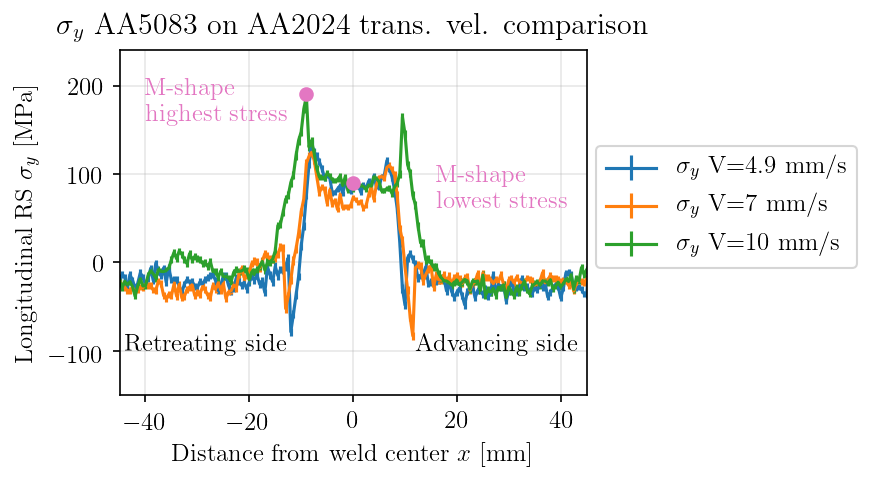

In [66]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 4.9, 2, 'Al', False, False], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 7, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 10, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure()

plt.title(syl + ' AA5083 on AA2024 trans. vel. comparison')
plt.xlabel(pxl)
plt.ylabel(stress_l_y)

plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' V=4.9 mm/s')
plt.errorbar(data2.index, data2['1;s22'] -20, yerr=data2['esd-1;s22'], label=syl+' V=7 mm/s')
plt.errorbar(data3.index, data3['1;s22'] -20, yerr=data3['esd-1;s22'], label=syl+' V=10 mm/s')
# plt.errorbar(data1.index, data1['1;s11']+30, yerr=data1['esd-1;s11'], label=sxl+' V=4.9 mm/s')
# plt.errorbar(data2.index, data2['1;s11'], yerr=data2['esd-1;s11'], label=sxl+' V=7 mm/s')
# plt.errorbar(data3.index, data3['1;s11'], yerr=data3['esd-1;s11'], label=sxl+' V=10 mm/s')
plt.axis(scale_al)

plt.plot((-9, 0), (190, 90), label=None, marker='o', linestyle='', color=colors[6], zorder=10)
plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-44, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.text(-40, 160, 'M-shape\nhighest stress', size=plt.rcParams['font.size'], color=colors[6])
plt.text(16, 62, 'M-shape\nlowest stress', size=plt.rcParams['font.size'], color=colors[6])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '5083_tr_vel_sy.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

57.97208830777563
17.228310311992672


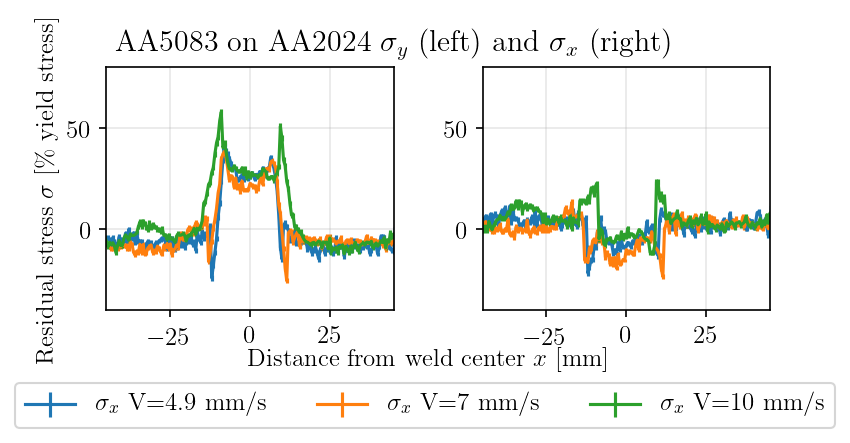

In [87]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 4.9, 2, 'Al', False, False], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 7, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 10, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 0.9 * plt.rcParams['figure.figsize'][1]))

fig.suptitle('AA5083 on AA2024 ' + syl + ' (left) and ' + sxl + ' (right)')
plt.subplot(121)
# plt.xlabel(pxl)
plt.ylabel(stress_l[:-5] + '[\% yield stress]')

plt.errorbar(data1.index, data1['1;s22'] / 3.24, yerr=data1['esd-1;s22'] / 3.24, label=syl+' V=4.9 mm/s')
plt.errorbar(data2.index, (data2['1;s22'] -20) / 3.24, yerr=data2['esd-1;s22'] / 3.24, label=syl+' V=7 mm/s')
plt.errorbar(data3.index, (data3['1;s22'] -20) / 3.24, yerr=data3['esd-1;s22'] / 3.24, label=syl+' V=10 mm/s')
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_al[:2] + (-40, 80))
print((data3['1;s22'].max() -20) / 3.24)

plt.subplot(122)
plt.errorbar(data1.index, (data1['1;s11']+30) / 3.24, yerr=data1['esd-1;s11'] / 3.24, label=sxl+' V=4.9 mm/s')
plt.errorbar(data2.index, data2['1;s11'] / 3.24, yerr=data2['esd-1;s11'] / 3.24, label=sxl+' V=7 mm/s')
plt.errorbar(data3.index, data3['1;s11'] / 3.24, yerr=data3['esd-1;s11'] / 3.24, label=sxl+' V=10 mm/s')
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_al[:2] + (-40, 80))
print((data3['1;s11'].max() -20) / 3.24)

plt.tight_layout()
fig.subplots_adjust(top=0.89, bottom=0.3)
leg = plt.legend(loc=9, bbox_to_anchor=(-0.2, -0.25), ncol=3)
fig.text(0.32, 0.18, pxl, va='center')

plt.savefig(os.path.join(plot_wd, 'CONCL_' + '5083_tr_vel_sx_sy_yield.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

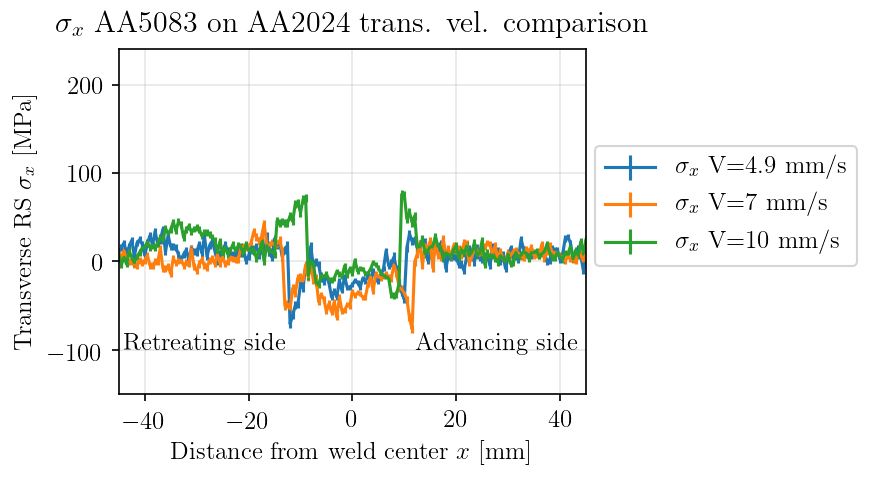

In [68]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 4.9, 2, 'Al', False, False], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 7, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 10, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure()

plt.title(sxl + ' AA5083 on AA2024 trans. vel. comparison')
plt.xlabel(pxl)
plt.ylabel(stress_l_x)

# plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' V=4.9 mm/s')
# plt.errorbar(data2.index, data2['1;s22'] -20, yerr=data2['esd-1;s22'], label=syl+' V=7 mm/s')
# plt.errorbar(data3.index, data3['1;s22'] -20, yerr=data3['esd-1;s22'], label=syl+' V=10 mm/s')
plt.errorbar(data1.index, data1['1;s11']+30, yerr=data1['esd-1;s11'], label=sxl+' V=4.9 mm/s')
plt.errorbar(data2.index, data2['1;s11'], yerr=data2['esd-1;s11'], label=sxl+' V=7 mm/s')
plt.errorbar(data3.index, data3['1;s11'], yerr=data3['esd-1;s11'], label=sxl+' V=10 mm/s')
plt.axis(scale_al)

# plt.plot((-9, 0), (190, 90), label=None, marker='o', linestyle='', color=colors[6])
plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-44, -100, 'Retreating side', size=plt.rcParams['font.size'])
# plt.text(-40, 160, 'M-shape\nhighest stress', size=plt.rcParams['font.size'], color=colors[6])
# plt.text(16, 62, 'M-shape\nlowest stress', size=plt.rcParams['font.size'], color=colors[6])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '5083_tr_vel_sx.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

208.12852316093264 173.85334421336148 175.39394400088858
0.912844399828652 0.7625146676024627 0.7692716842144236


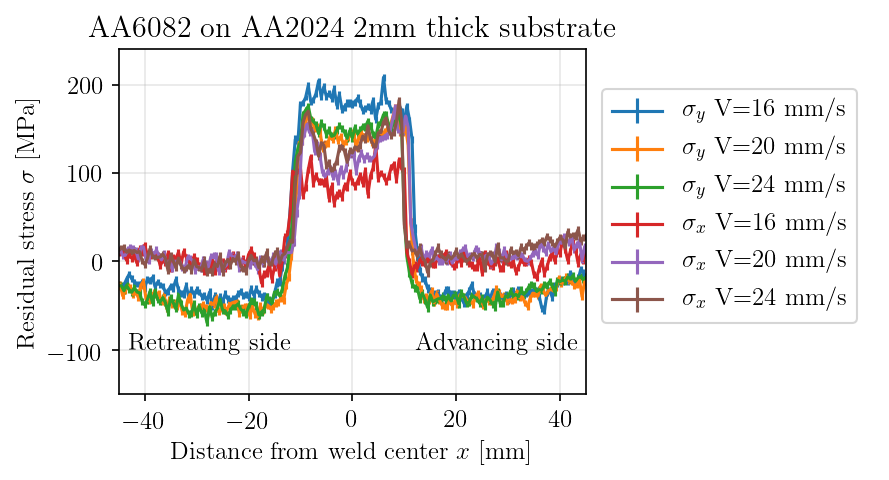

In [69]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 20, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 24, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure()
plt.title('AA6082 on AA2024 2mm thick substrate')
plt.xlabel(pxl)
plt.ylabel(stress_l)

plt.errorbar(data1.index + 1.5, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' V=16 mm/s')
plt.errorbar(data2.index, data2['1;s22'], yerr=data2['esd-1;s22'], label=syl+' V=20 mm/s')
plt.errorbar(data3.index, data3['1;s22'] - 30, yerr=data3['esd-1;s22'], label=syl+' V=24 mm/s')
plt.errorbar(data1.index, data1['1;s11'] - 40, yerr=data1['esd-1;s11'], label=sxl+' V=16 mm/s')
plt.errorbar(data2.index, data2['1;s11'] + 40, yerr=data2['esd-1;s11'], label=sxl+' V=20 mm/s')
plt.errorbar(data3.index, data3['1;s11'] + 10, yerr=data3['esd-1;s11'], label=sxl+' V=24 mm/s')
plt.axis(scale_al)

print(data1['1;s22'].max(), (data2['1;s22'].max()), (data3['1;s22'].max()-30))
print(data1['1;s22'].max() / 228., data2['1;s22'].max() / 228., (data3['1;s22'].max()-30) / 228.)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-43, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_tr_vel.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

208.12852316093264 173.85334421336148 175.39394400088858
0.912844399828652 0.7625146676024627 0.7692716842144236


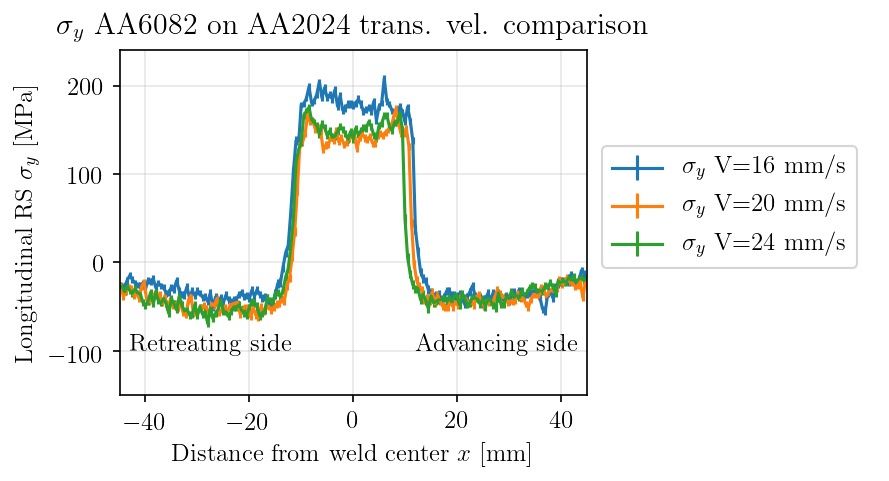

In [70]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 20, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 24, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure()
plt.title(syl + ' AA6082 on AA2024 trans. vel. comparison')
plt.xlabel(pxl)
plt.ylabel(stress_l_y)

plt.errorbar(data1.index + 1.5, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' V=16 mm/s')
plt.errorbar(data2.index, data2['1;s22'], yerr=data2['esd-1;s22'], label=syl+' V=20 mm/s')
plt.errorbar(data3.index, data3['1;s22'] - 30, yerr=data3['esd-1;s22'], label=syl+' V=24 mm/s')
# plt.errorbar(data1.index, data1['1;s11'] - 40, yerr=data1['esd-1;s11'], label=sxl+' V=16 mm/s')
# plt.errorbar(data2.index, data2['1;s11'] + 40, yerr=data2['esd-1;s11'], label=sxl+' V=20 mm/s')
# plt.errorbar(data3.index, data3['1;s11'] + 10, yerr=data3['esd-1;s11'], label=sxl+' V=24 mm/s')
plt.axis(scale_al)

print(data1['1;s22'].max(), (data2['1;s22'].max()), (data3['1;s22'].max()-30))
print(data1['1;s22'].max() / 228., data2['1;s22'].max() / 228., (data3['1;s22'].max()-30) / 228.)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-43, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_tr_vel_sy.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

208.12852316093264 173.85334421336148 175.39394400088858
0.912844399828652 0.7625146676024627 0.7692716842144236


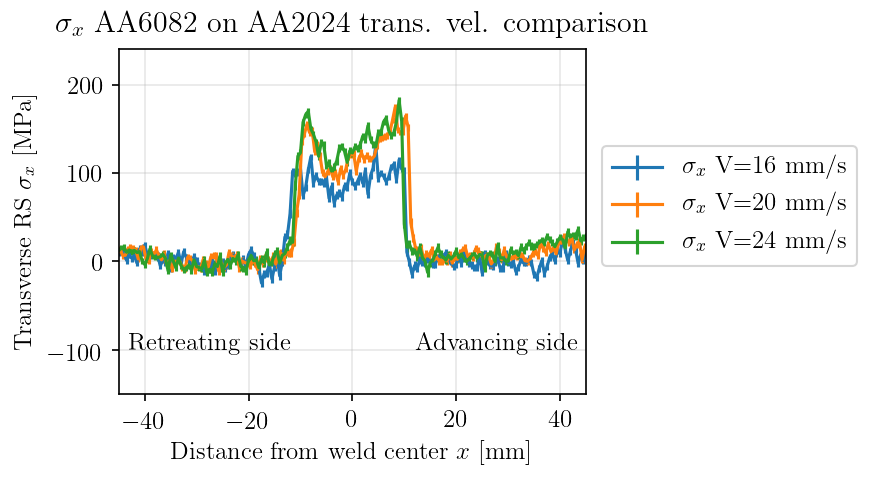

In [71]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 20, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 24, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure()
plt.title(sxl + ' AA6082 on AA2024 trans. vel. comparison')
plt.xlabel(pxl)
plt.ylabel(stress_l_x)

# plt.errorbar(data1.index + 1.5, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' V=16 mm/s')
# plt.errorbar(data2.index, data2['1;s22'], yerr=data2['esd-1;s22'], label=syl+' V=20 mm/s')
# plt.errorbar(data3.index, data3['1;s22'] - 30, yerr=data3['esd-1;s22'], label=syl+' V=24 mm/s')
plt.errorbar(data1.index, data1['1;s11'] - 40, yerr=data1['esd-1;s11'], label=sxl+' V=16 mm/s')
plt.errorbar(data2.index, data2['1;s11'] + 40, yerr=data2['esd-1;s11'], label=sxl+' V=20 mm/s')
plt.errorbar(data3.index, data3['1;s11'] + 10, yerr=data3['esd-1;s11'], label=sxl+' V=24 mm/s')
plt.axis(scale_al)

print(data1['1;s22'].max(), (data2['1;s22'].max()), (data3['1;s22'].max()-30))
print(data1['1;s22'].max() / 228., data2['1;s22'].max() / 228., (data3['1;s22'].max()-30) / 228.)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-43, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.07, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_tr_vel_sx.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

64.23719850646069
17.370730098987533


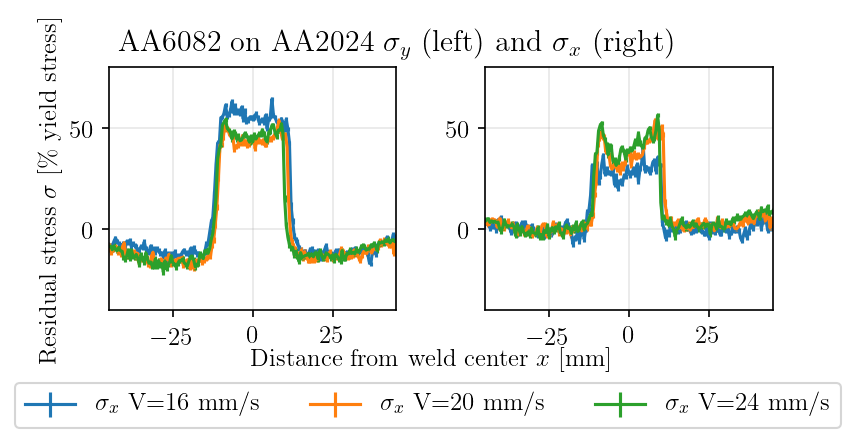

In [88]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 20, 2, 'Al', False, False], {1: e_params_al})
data3 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 24, 2, 'Al', False, False], {1: e_params_al})

fig = plt.figure(figsize=(plt.rcParams['figure.figsize'][0], 0.9 * plt.rcParams['figure.figsize'][1]))
fig.suptitle('AA6082 on AA2024 ' + syl + ' (left) and ' + sxl + ' (right)')
plt.subplot(121)
# plt.xlabel(pxl)
plt.ylabel(stress_l[:-5] + '[\% yield stress]')

plt.errorbar(data1.index + 1.5, data1['1;s22'] / 3.24, yerr=data1['esd-1;s22'] / 3.24, label=syl+' V=16 mm/s')
plt.errorbar(data2.index, data2['1;s22'] / 3.24, yerr=data2['esd-1;s22'] / 3.24, label=syl+' V=20 mm/s')
plt.errorbar(data3.index, (data3['1;s22'] - 30) / 3.24, yerr=data3['esd-1;s22'] / 3.24, label=syl+' V=24 mm/s')
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_al[:2] + (-40, 80))
print(data1['1;s22'].max() / 3.24)

plt.subplot(122)
plt.errorbar(data1.index, (data1['1;s11'] - 40) / 3.24, yerr=data1['esd-1;s11'] / 3.24, label=sxl+' V=16 mm/s')
plt.errorbar(data2.index, (data2['1;s11'] + 40) / 3.24, yerr=data2['esd-1;s11'] / 3.24, label=sxl+' V=20 mm/s')
plt.errorbar(data3.index, (data3['1;s11'] + 10) / 3.24, yerr=data3['esd-1;s11'] / 3.24, label=sxl+' V=24 mm/s')
plt.grid(which='both', axis='both', alpha=0.3)
plt.axis(scale_al[:2] + (-40, 80))
print((data3['1;s11'].max() + 10) / 3.24 / 3.24)

plt.tight_layout()
fig.subplots_adjust(top=0.89, bottom=0.3)
leg = plt.legend(loc=9, bbox_to_anchor=(-0.2, -0.25), ncol=3)
fig.text(0.32, 0.18, pxl, va='center')

plt.savefig(os.path.join(plot_wd, 'CONCL_' + '6082_tr_vel_sx_sy_yield.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

208.12852316093264 169.8309959612202 175.39394400088858
0.912844399828652 0.7448727893035973 0.7692716842144236


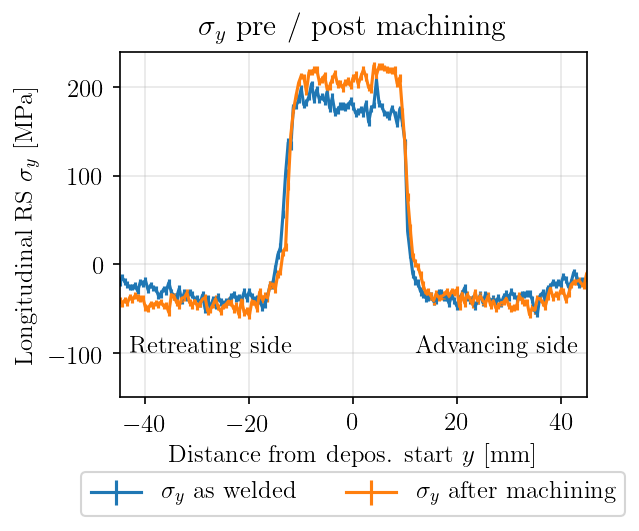

In [73]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', True, False].iloc[0], {1: e_params_al})

fig = plt.figure()
plt.title(syl + ' pre / post machining')
plt.xlabel(pyl)
plt.ylabel(stress_l_y)

plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' as welded')
plt.errorbar(data2.index + 2, data2['1;s22']+55, yerr=data2['esd-1;s22'], label=syl+' after machining')
# plt.errorbar(data1.index, data1['1;s11'] - 40, yerr=data1['esd-1;s11'], label=sxl+' as welded')
# plt.errorbar(data2.index + 2, data2['1;s11']+15, yerr=data2['esd-1;s11'], label=sxl+' after machining')
plt.axis(scale_al)

print(data1['1;s22'].max(), (data2['1;s22'].max()), (data3['1;s22'].max()-30))
print(data1['1;s22'].max() / 228., data2['1;s22'].max() / 228., (data3['1;s22'].max()-30) / 228.)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-43, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_machining_sy.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

208.12852316093264 169.8309959612202 175.39394400088858
0.912844399828652 0.7448727893035973 0.7692716842144236


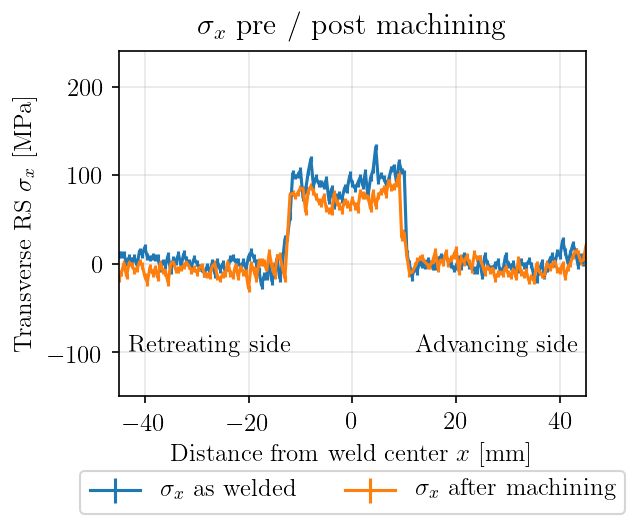

In [74]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', True, False].iloc[0], {1: e_params_al})

fig = plt.figure()
plt.title(sxl + ' pre / post machining')
plt.xlabel(pxl)
plt.ylabel(stress_l_x)

# plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' as welded')
# plt.errorbar(data2.index + 2, data2['1;s22']+55, yerr=data2['esd-1;s22'], label=syl+' after machining')
plt.errorbar(data1.index, data1['1;s11'] - 40, yerr=data1['esd-1;s11'], label=sxl+' as welded')
plt.errorbar(data2.index + 2, data2['1;s11']+15, yerr=data2['esd-1;s11'], label=sxl+' after machining')
plt.axis(scale_al)

print(data1['1;s22'].max(), (data2['1;s22'].max()), (data3['1;s22'].max()-30))
print(data1['1;s22'].max() / 228., data2['1;s22'].max() / 228., (data3['1;s22'].max()-30) / 228.)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-43, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_machining_sx.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

208.12852316093264 169.8309959612202 175.39394400088858
0.912844399828652 0.7448727893035973 0.7692716842144236
1.1800183257229495
0.8732927249307719


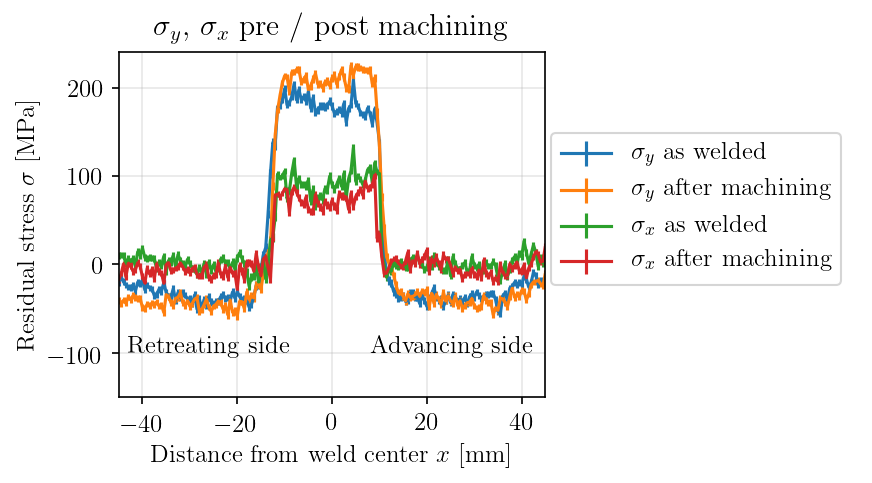

In [75]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', True, False].iloc[0], {1: e_params_al})

fig = plt.figure()
plt.title(syl + ', ' + sxl + ' pre / post machining')
plt.xlabel(pxl)
plt.ylabel(stress_l)

plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' as welded')
plt.errorbar(data2.index + 2, data2['1;s22']+55, yerr=data2['esd-1;s22'], label=syl+' after machining')
plt.errorbar(data1.index, data1['1;s11'] - 40, yerr=data1['esd-1;s11'], label=sxl+' as welded')
plt.errorbar(data2.index + 2, data2['1;s11']+15, yerr=data2['esd-1;s11'], label=sxl+' after machining')
plt.axis(scale_al)

print(data1['1;s22'].max(), (data2['1;s22'].max()), (data3['1;s22'].max()-30))
print(data1['1;s22'].max() / 228., data2['1;s22'].max() / 228., (data3['1;s22'].max()-30) / 228.)

plt.text(8, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-43, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

# leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.18), ncol=2)
fig.subplots_adjust(right=0.65)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.6))

print((data2['1;s22'][-5:5].mean()+55)/data1['1;s22'][-5:5].mean())
print((data2['1;s11'][-5:5].mean()+55)/data1['1;s11'][-5:5].mean())

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_machining_sy_sx.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

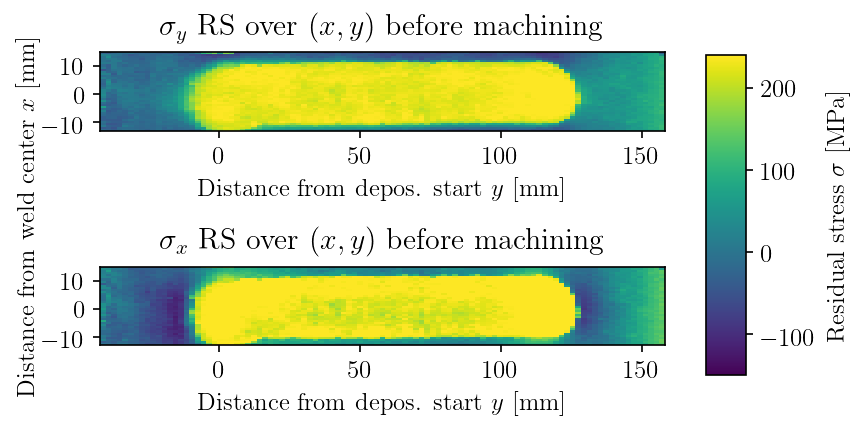

In [76]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, 'Al1891.csv'), {0: e_params_al})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, 'Al1891_true_ind.csv'), squeeze=True, index_col=0, header=None)

d.index = map(lambda x: true_ind[x], 1 + np.arange(d.shape[0]))
d = d.reindex(index=np.arange(np.min(np.array(d.index)), np.max(np.array(d.index)) + 1))
d = d.interpolate()

step = 101

fig = plt.figure()
plt.subplot(211)
plt.title(syl + ' RS over $(x,y)$ before machining')
plt.xlabel(pyl)
plt.imshow(np.array(d['0;s22']).reshape((step, d.shape[0] // step)).T[::-1,::-1], aspect=1, 
           interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3]+40, 
           extent=[-42, 158, -12.9, 14.9])
plt.subplot(212)
plt.title(sxl + ' RS over $(x,y)$ before machining')
plt.xlabel(pyl)
im = plt.imshow(np.array(d['0;s11']).reshape((step, d.shape[0] // step)).T[::-1,::-1], aspect=1, 
                interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], 
                extent=[-42, 158, -12.9, 14.9])
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pxl, va='center', rotation='vertical')


plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_aswelded.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

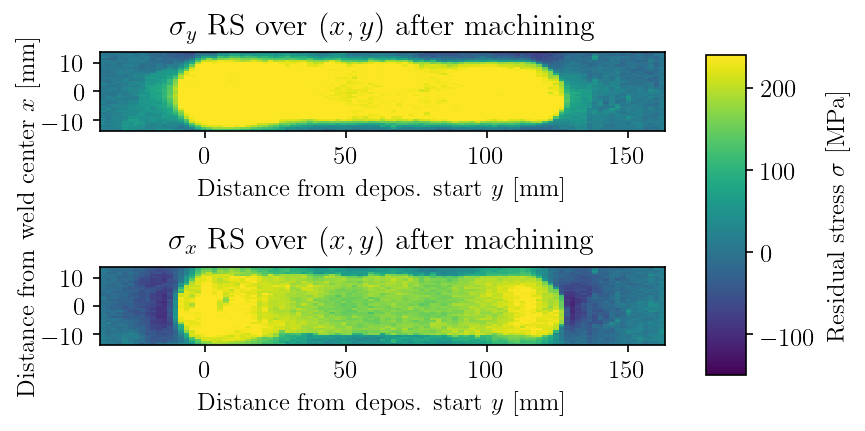

In [77]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, 'Al1890.csv'), {2: e_params_al})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, 'Al1890_true_ind.csv'), squeeze=True, index_col=0, header=None)

d.index = map(lambda x: true_ind[int(x[14:-4])], d['name'].values)
d = d.reindex(index=np.arange(np.min(np.array(d.index)), np.max(np.array(d.index)) + 1))
d = d.interpolate()

step = 101

fig = plt.figure()
plt.subplot(211)
plt.title(syl + ' RS over $(x,y)$ after machining')
plt.xlabel(pyl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)).T, aspect=1, 
           interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], 
           extent=[-37, 163, -13.9, 13.9])
plt.subplot(212)
plt.title(sxl + ' RS over $(x,y)$ after machining')
plt.xlabel(pyl)
im = plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)).T, aspect=1, 
                interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], 
                extent=[-37, 163, -13.9, 13.9])
plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pxl, va='center', rotation='vertical')


plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_machined.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

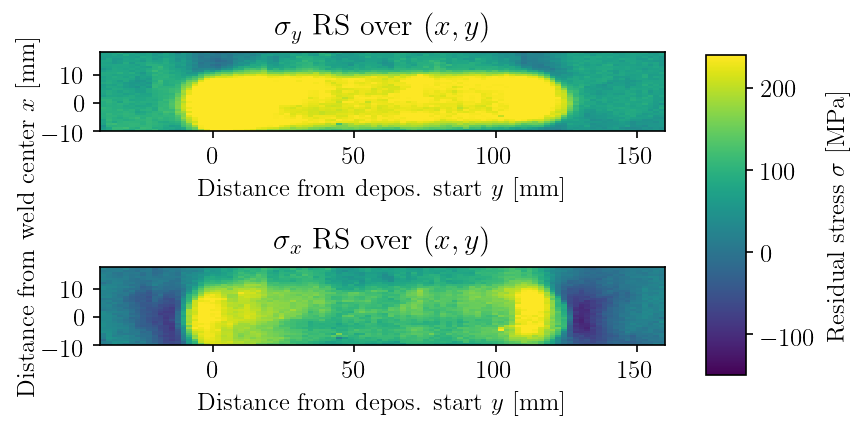

In [78]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, 'Al1904.csv'), {2: e_params_al})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, 'Al1904_true_ind.csv'), squeeze=True, index_col=0, header=None)

d.index = map(lambda x: true_ind[int(x[14:-4])], d['name'].values)
d = d.reindex(index=np.arange(np.min(np.array(d.index)), np.max(np.array(d.index)) + 1))
d = d.interpolate()

step = 98

fig = plt.figure()
plt.subplot(211)
plt.title(syl + ' RS over $(x,y)$')
plt.xlabel(pyl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)).T, aspect=1, 
           interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], 
           extent=[-40, 160, -9.9, 17.9])
plt.subplot(212)
plt.title(sxl + ' RS over $(x,y)$')
plt.xlabel(pyl)
im = plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)).T, aspect=1, 
                interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], 
                extent=[-40, 160, -9.9, 17.9])
plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pxl, va='center', rotation='vertical')

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_tr49.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

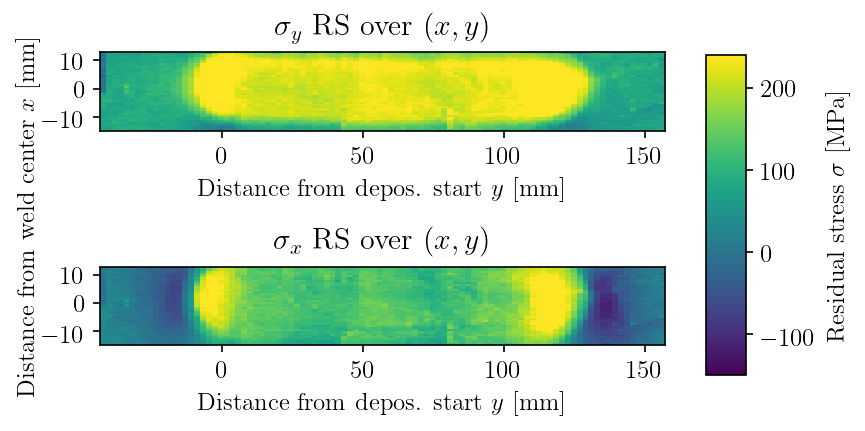

In [79]:
d = read_gsas_strain_csv(os.path.join(scans_2d_dir, 'Al1906.csv'), {2: e_params_al})
true_ind = pd.read_csv(os.path.join(scans_2d_dir, 'Al1906_true_ind.csv'), squeeze=True, index_col=0, header=None)

d.index = map(lambda x: true_ind[int(x[14:-4])], d['name'].values)
d = d.reindex(index=np.arange(np.min(np.array(d.index)), np.max(np.array(d.index)) + 1))
d = d.interpolate()

step = 96

fig = plt.figure()
plt.subplot(211)
plt.title(syl + ' RS over $(x,y)$')
plt.xlabel(pyl)
plt.imshow(np.array(d['2;s22']).reshape((step, d.shape[0] // step)).T[:,::-1], aspect=1, 
           interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], extent=[-43, 157, -14.9, 12.9])
plt.subplot(212)
plt.title(sxl + ' RS over $(x,y)$')
plt.xlabel(pyl)
im = plt.imshow(np.array(d['2;s11']).reshape((step, d.shape[0] // step)).T[:,::-1], aspect=1, 
                interpolation='nearest', origin='lower', vmin=scale_al[2], vmax=scale_al[3], 
                extent=[-43, 157, -14.9, 12.9])
plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pxl, va='center', rotation='vertical')

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_sx_tr10.png'), 
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)

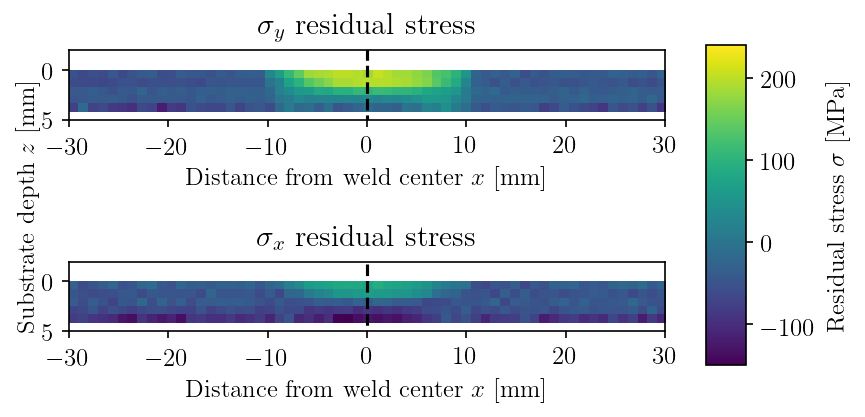

In [80]:
conical_x, conical_y = read_conical_slits_data(conical_slit_scans_idx['Al6082', 16, 4, 'Al'], e_params_al)
mi, ma = min(np.nanmin(conical_x), np.nanmin(conical_y)), max(np.nanmax(conical_x), np.nanmax(conical_y))

fig = plt.figure()

plt.subplot(211)
plt.title(syl+' residual stress')
plt.imshow(conical_x, vmin=scale_al[2], vmax=scale_al[3], extent=[-33, 37, 5, 0])
plt.plot((0, 0), (-400, 600), '--', label=None, color='Black')
plt.axis((-30, 30, 5, -2))
plt.xlabel(pxl)

plt.subplot(212)
plt.title(sxl+' residual stress')
im = plt.imshow(conical_y, vmin=scale_al[2], vmax=scale_al[3], extent=[-33, 37, 5, 0])
plt.plot((0, 0), (-400, 600), '--', label=None, color='Black')
plt.axis((-30, 30, 5, -2))
plt.xlabel(pxl)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pzl, va='center', rotation='vertical');

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_con_16.png'), bbox_inches="tight", pad_inches=0.1)

(5, 71)


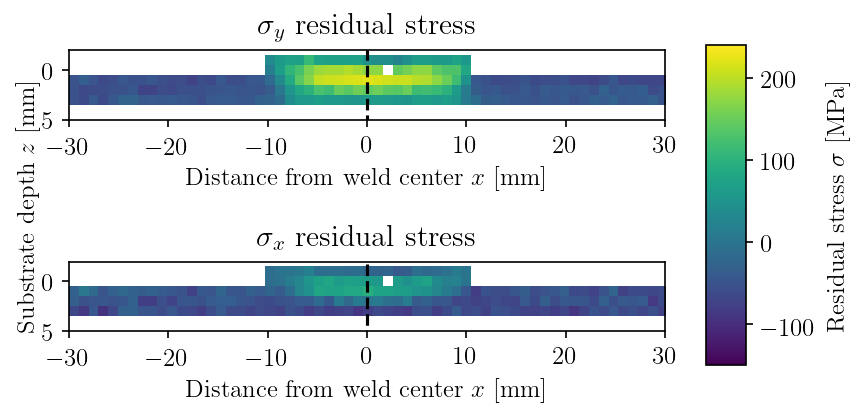

In [81]:
conical_x, conical_y = read_conical_slits_data(conical_slit_scans_idx['Al6082', 20, 4, 'Al'], e_params_al)
mi, ma = min(np.nanmin(conical_x), np.nanmin(conical_y)), max(np.nanmax(conical_x), np.nanmax(conical_y))
print(conical_x.shape)
fig = plt.figure()

plt.subplot(211)
plt.title(syl+' residual stress')
plt.imshow(conical_x, vmin=scale_al[2], vmax=scale_al[3], extent=[-30, 40, 3.5, -1.5])
plt.plot((0, 0), (-400, 600), '--', label=None, color='Black')
plt.axis((-30, 30, 5, -2))
plt.xlabel(pxl)

plt.subplot(212)
plt.title(sxl+' residual stress')
im = plt.imshow(conical_y, vmin=scale_al[2], vmax=scale_al[3], extent=[-30, 40, 3.5, -1.5])
plt.plot((0, 0), (-400, 600), '--', label=None, color='Black')
plt.axis((-30, 30, 5, -2))
plt.xlabel(pxl)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pzl, va='center', rotation='vertical');

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_con_20.png'), bbox_inches="tight", pad_inches=0.1)

(5, 71)


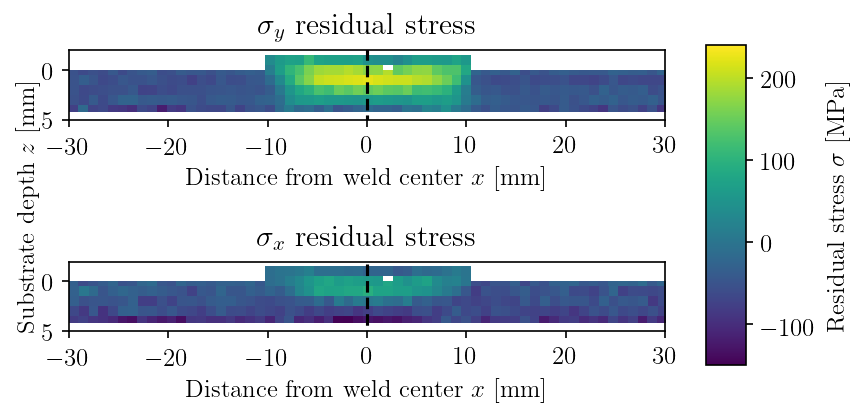

In [82]:
conical_x, conical_y = read_conical_slits_data(conical_slit_scans_idx['Al6082', 20, 4, 'Al'], e_params_al)
conical_x2, conical_y2 = read_conical_slits_data(conical_slit_scans_idx['Al6082', 16, 4, 'Al'], e_params_al)
mi, ma = min(np.nanmin(conical_x), np.nanmin(conical_y)), max(np.nanmax(conical_x), np.nanmax(conical_y))
print(conical_x.shape)
fig = plt.figure()

plt.subplot(211)
plt.title(syl+' residual stress')
plt.imshow(conical_x2, vmin=scale_al[2], vmax=scale_al[3], extent=[-33, 37, 5, 0])
plt.imshow(conical_x, vmin=scale_al[2], vmax=scale_al[3], extent=[-30, 40, 3.5, -1.5])
plt.plot((0, 0), (-400, 600), '--', label=None, color='Black')
plt.axis((-30, 30, 5, -2))
plt.xlabel(pxl)

plt.subplot(212)
plt.title(sxl+' residual stress')
im = plt.imshow(conical_y2, vmin=scale_al[2], vmax=scale_al[3], extent=[-33, 37, 5, 0])
im = plt.imshow(conical_y, vmin=scale_al[2], vmax=scale_al[3], extent=[-30, 40, 3.5, -1.5])
plt.plot((0, 0), (-400, 600), '--', label=None, color='Black')
plt.axis((-30, 30, 5, -2))
plt.xlabel(pxl)

plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label(stress_l)
fig.text(0.0, 0.5, pzl, va='center', rotation='vertical')

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '2d_con_combined.png'), bbox_inches="tight", pad_inches=0.1)

2.5996028898154826 3.17465424577324 3.17465424577324


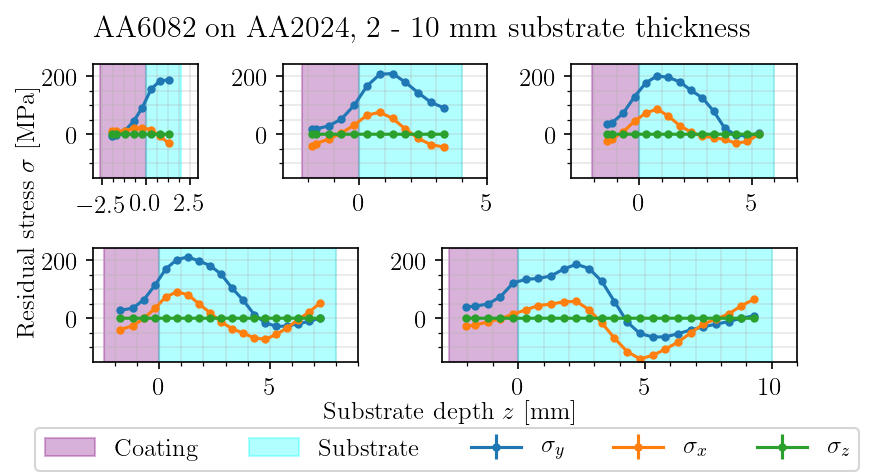

In [83]:
long10, norm10, trans10 = read_steca_output(neutron_depth_scans_idx['Al6082', 16, 10, 'Al', 'Center'], e_params_al)
long10['X'] -= neutron_depth_scans_offsets['Al6082', 16, 10, 'Al']
norm10['X'] -= neutron_depth_scans_offsets['Al6082', 16, 10, 'Al']
trans10['X'] -= neutron_depth_scans_offsets['Al6082', 16, 10, 'Al']

long8, norm8, trans8 = read_steca_output(neutron_depth_scans_idx['Al6082', 16, 8, 'Al', 'Center'], e_params_al)
long8['X'] -= neutron_depth_scans_offsets['Al6082', 16, 8, 'Al']
norm8['X'] -= neutron_depth_scans_offsets['Al6082', 16, 8, 'Al']
trans8['X'] -= neutron_depth_scans_offsets['Al6082', 16, 8, 'Al']

long6, norm6, trans6 = read_steca_output(neutron_depth_scans_idx['Al6082', 16, 6, 'Al', 'Center'], e_params_al)
long6['X'] -= neutron_depth_scans_offsets['Al6082', 16, 6, 'Al']
norm6['X'] -= neutron_depth_scans_offsets['Al6082', 16, 6, 'Al']
trans6['X'] -= neutron_depth_scans_offsets['Al6082', 16, 6, 'Al']

long4, norm4, trans4 = read_steca_output(neutron_depth_scans_idx['Al6082', 16, 4, 'Al', 'Center'], e_params_al)
long4['X'] -= neutron_depth_scans_offsets['Al6082', 16, 4, 'Al']
norm4['X'] -= neutron_depth_scans_offsets['Al6082', 16, 4, 'Al']
trans4['X'] -= neutron_depth_scans_offsets['Al6082', 16, 4, 'Al']

long2, norm2, trans2 = read_steca_output(neutron_depth_scans_idx['Al6082', 16, 2, 'Al', 'Center'], e_params_al)
long2['X'] -= neutron_depth_scans_offsets['Al6082', 16, 2, 'Al']
norm2['X'] -= neutron_depth_scans_offsets['Al6082', 16, 2, 'Al']
trans2['X'] -= neutron_depth_scans_offsets['Al6082', 16, 2, 'Al']


grid = plt.GridSpec(3, 4, height_ratios=(.1, 1, 1), width_ratios=(7, 5, 3, 15))
fig = plt.figure()
fig.suptitle("AA6082  on AA2024, 2 - 10 mm substrate thickness")

ax = plt.subplot(grid[1, 0])
plt.minorticks_on()
plt.errorbar(long2['X'], long2['stress'], yerr=long2['sstress'], label=syl, linestyle='-', marker='.')
plt.errorbar(trans2['X'], trans2['stress'], yerr=trans2['sstress'], label=sxl, linestyle='-', marker='.')
plt.errorbar(norm2['X'], norm2['stress'], yerr=norm2['sstress'], label=szl, linestyle='-', marker='.')
plt.axis((-3, 3) + scale_al[2:])
plt.axvspan(-2.6, 0, color='purple', alpha=0.3)
plt.axvspan(0, 2, color='cyan', alpha=0.3)
plt.grid(which='both', axis='both', alpha=0.3)

plt.subplot(grid[1, 1:3])
plt.minorticks_on()
plt.errorbar(long4['X'], long4['stress'], yerr=long4['sstress'], label=syl, linestyle='-', marker='.')
plt.errorbar(trans4['X'], trans4['stress'], yerr=trans4['sstress'], label=sxl, linestyle='-', marker='.')
plt.errorbar(norm4['X'], norm4['stress'], yerr=norm4['sstress'], label=szl, linestyle='-', marker='.')
plt.axis((-3, 5) + scale_al[2:])
plt.axvspan(-2.24, 0, color='purple', alpha=0.3)
plt.axvspan(0, 4, color='cyan', alpha=0.3)
plt.grid(which='both', axis='both', alpha=0.3)

plt.subplot(grid[1, 3])
plt.minorticks_on()
plt.errorbar(long6['X'], long6['stress'], yerr=long6['sstress'], label=syl, linestyle='-', marker='.')
plt.errorbar(trans6['X'], trans6['stress'], yerr=trans6['sstress'], label=sxl, linestyle='-', marker='.')
plt.errorbar(norm6['X'], norm6['stress'], yerr=norm6['sstress'], label=szl, linestyle='-', marker='.')
plt.axis((-3, 7) + scale_al[2:])
plt.axvspan(-2.11, 0, color='purple', alpha=0.3)
plt.axvspan(0, 6, color='cyan', alpha=0.3)
plt.grid(which='both', axis='both', alpha=0.3)

plt.subplot(grid[2, :2])
plt.minorticks_on()
plt.errorbar(long8['X'], long8['stress'], yerr=long8['sstress'], label=syl, linestyle='-', marker='.')
plt.errorbar(trans8['X'], trans8['stress'], yerr=trans8['sstress'], label=sxl, linestyle='-', marker='.')
plt.errorbar(norm8['X'], norm8['stress'], yerr=norm8['sstress'], label=szl, linestyle='-', marker='.')
plt.axis((-3, 9) + scale_al[2:])
plt.axvspan(-2.49, 0, color='purple', alpha=0.3)
plt.axvspan(0, 8, color='cyan', alpha=0.3)
plt.grid(which='both', axis='both', alpha=0.3)

plt.subplot(grid[2, 2:])
plt.minorticks_on()
l1 = plt.errorbar(long10['X'], long10['stress'], yerr=long10['sstress'], label=syl, linestyle='-', marker='.')
l2 = plt.errorbar(trans10['X'], trans10['stress'], yerr=trans10['sstress'], label=sxl, linestyle='-', marker='.')
l3 = plt.errorbar(norm10['X'], norm10['stress'], yerr=norm10['sstress'], label=szl, linestyle='-', marker='.')
plt.axis((-3, 11) + scale_al[2:])
plt.axvspan(-2.74, 0, color='purple', alpha=0.3)
plt.axvspan(0, 10, color='cyan', alpha=0.3)
plt.grid(which='both', axis='both', alpha=0.3)

fig.text(0.0, 0.55, stress_l, va='center', rotation='vertical')
fig.text(0.38, 0.11, pzl, va='center')
plt.tight_layout()
fig.subplots_adjust(bottom=0.22, top=1.05)
leg = fig.legend(('Coating', 'Substrate', syl, sxl, szl), ncol=5, loc='lower center', bbox_to_anchor=(0.55, -0.02))

print(long10['sstress'].mean(), trans10['sstress'].mean(), trans10['sstress'].mean())

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + 'neutron_all_depth.png'),bbox_inches="tight")


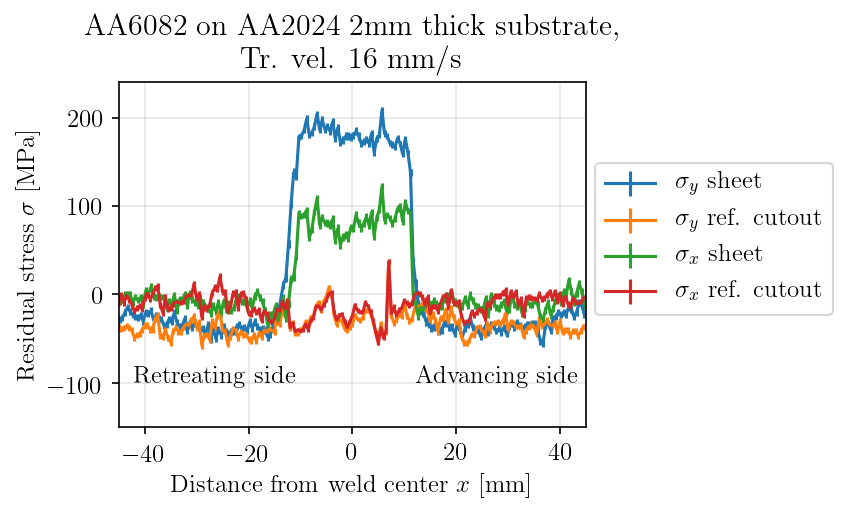

In [84]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, False].iloc[0], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al6082', 16, 2, 'Al', False, True], {1: e_params_al})
data2.index -= 12

fig = plt.figure()
plt.title('AA6082 on AA2024 2mm thick substrate,\nTr. vel. 16 mm/s')
plt.xlabel(pxl)
plt.ylabel(stress_l)

plt.errorbar(data1.index+1.2, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' sheet')
plt.errorbar(data2.index, data2['1;s22'], yerr=data2['esd-1;s11'], label=syl+' ref. cutout')
plt.errorbar(data1.index+1.2, data1['1;s11']-50, yerr=data1['esd-1;s11'], label=sxl+' sheet')
plt.errorbar(data2.index, data2['1;s11'], yerr=data2['esd-1;s22'], label=sxl+' ref. cutout')

plt.axis(scale_al)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-42, -100, 'Retreating side', size=plt.rcParams['font.size'])

plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.04, 0.6))
plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '6082_ref.png'), additional_artists=[leg], bbox_inches="tight", 
            pad_inches=0.1)



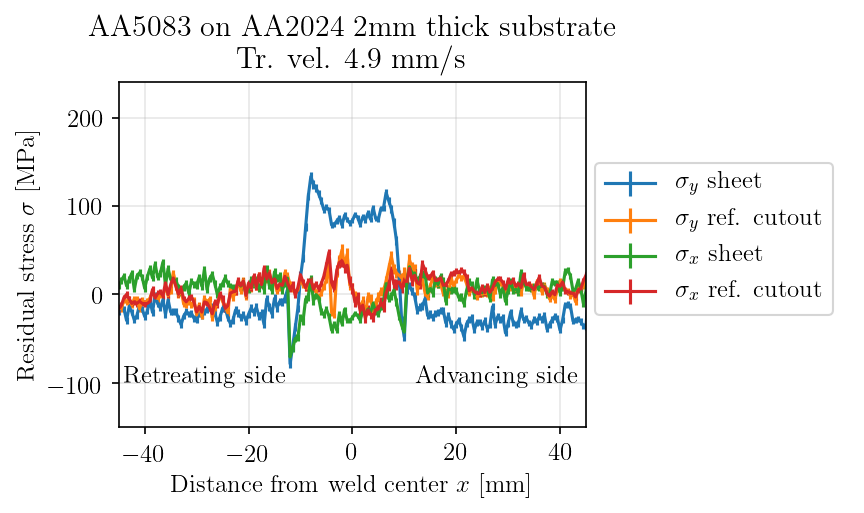

In [85]:
data1 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 4.9, 2, 'Al', False, False], {1: e_params_al})
data2 = read_gsas_strain_csv(tr_line_scan_idx['Al5083', 4.9, 2, 'Al', False, True], {1: e_params_al})

fig = plt.figure()

plt.title('AA5083 on AA2024 2mm thick substrate\nTr. vel. 4.9 mm/s')
plt.xlabel(pxl)
plt.ylabel(stress_l)

plt.errorbar(data1.index, data1['1;s22'], yerr=data1['esd-1;s22'], label=syl+' sheet')
plt.errorbar(data2.index, data2['1;s22']-20, yerr=data2['esd-1;s22'], label=syl+' ref. cutout')
plt.errorbar(data1.index, data1['1;s11']+30, yerr=data1['esd-1;s11'], label=sxl+' sheet')
plt.errorbar(data2.index, data2['1;s11']+10, yerr=data2['esd-1;s11'], label=sxl+' ref. cutout')
plt.axis(scale_al)

plt.text(12, -100, 'Advancing side', size=plt.rcParams['font.size'])
plt.text(-44, -100, 'Retreating side', size=plt.rcParams['font.size'])
plt.grid(which='both', axis='both', alpha=0.3)

fig.subplots_adjust(right=0.7)
leg = fig.legend(loc='center right', ncol=1, bbox_to_anchor=(1.04, 0.6))

plt.savefig(os.path.join(plot_wd, plot_prefix + '_' + '5083_ref.png'),
            additional_artists=[leg], bbox_inches="tight", pad_inches=0.1)
